## Data Cleaning

### Introduction

This notebook goes through the data cleaning step of the Capstone project. Although data cleaning is a time consuming and unexciting task, its a very important one. As the saying goes, "Garbage in, garbage out". Feeding dirty data into a model will provide results that are meaningless.

Specifically, this notebook aims to explain the following:
1. __Getting the data__ - In this case, the data have been scraped from a news website
2. __Cleaning the data__
3. __Organizing the data__ - Organizing the clean data such that it will be easy to input into other algorithms.

The organized data will take two standard text formats:

1. __Corpus__ - A collection of text
2. __Document-Term Matrix__ - Word counts in a matrix format

In [1]:
# Importing packages

import re
import string
import numpy as np
import pandas as pd
import math
import os

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings 
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
url = pd.read_csv("st_data.csv")
df = pd.DataFrame(url)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.shape

(7168, 7)

In [3]:
df.head()

,Headline,Publish Date,Category,Author,Author Title,Content,Tags
0,Top stories from The Straits Times on Wednesda...,"May 15, 2019, 7:15 am SGT",General,NaN,NaN,Good morning! Here are our top stories to kick...,['NEWSLETTER']
1,"ST Now, News As It Happens - May 15, 2019","May 15, 2019, 5:37 am SGT",General,NaN,NaN,"Welcome to ST Now, News As It Happens. Recap o...",['LIVE BLOG']
2,"What else, other than Sejarah Melayu, can you ...","May 15, 2019, 4:00 am SGT",General,NaN,NaN,All the talk about The First Print exhibition ...,"['ASK NLB', 'NATIONAL LIBRARY BOARD']"
3,NUS approves plans by students' union to hold ...,"May 14, 2019, 11:50 pm SGT",General,Shabana Begum,NaN,SINGAPORE - The National University of Singapo...,"['NUS', 'VOYEURS']"
4,Water management social enterprise is the firs...,"May 14, 2019, 11:15 pm SGT",General,Shabana Begum,NaN,"SINGAPORE - A local water management company, ...","['WATER CONSERVATION', 'AWARDS AND PRIZES']"


In [4]:
# Some articles on Straits Times are summary for the week which provide no relevant or valuable content
df.Content[0]

'Good morning! Here are our top stories to kick-start your Wednesday, May 15.Asian stocks were poised to track the rebound in US equities as President Donald Trump said he had an ongoing dialogue with China, assuaging some concern about the deteriorating trade war.\xa0READ MORE HEREInfections surged by more than 50 per cent to 294 cases last week, from 194 the week before.READ MORE HEREFacebook\'s WhatsApp said a security breach on its messaging app had signs of coming from a private company working on surveillance.READ MORE HEREMelissa Chan shares her story in this series on millennials who inspire us.READ MORE HEREThe move is in light of four reported cases of voyeurism on university campuses in the past three weeks.READ MORE HEREStopping smoking, a healthy diet and avoiding harmful use of alcohol were also among the recommendations of the WHO\'s report, entitled "Risk reduction of cognitive decline and dementia".READ MORE HEREBeijing is counting on vast domestic market to help it we

In [5]:
# Removing articles with summary of other articles
for i,s in enumerate(df.Content):
    if 'Good morning!' in s:
        df.drop(i,inplace=True)
        
    elif 'Welcome to ST Now' in s:
        df.drop(i,inplace=True)
        
df.reset_index(inplace=True,drop=True)
# for i,s in enumerate(df.Content):
#     if 'Welcome to ST Now' in s:
#         df.drop(i,inplace=True)
# df.reset_index(inplace=True,drop=True)

In [6]:
df.shape # Here we are left with 6830 articles

(6830, 7)

In [7]:
df.head()

,Headline,Publish Date,Category,Author,Author Title,Content,Tags
0,"What else, other than Sejarah Melayu, can you ...","May 15, 2019, 4:00 am SGT",General,NaN,NaN,All the talk about The First Print exhibition ...,"['ASK NLB', 'NATIONAL LIBRARY BOARD']"
1,NUS approves plans by students' union to hold ...,"May 14, 2019, 11:50 pm SGT",General,Shabana Begum,NaN,SINGAPORE - The National University of Singapo...,"['NUS', 'VOYEURS']"
2,Water management social enterprise is the firs...,"May 14, 2019, 11:15 pm SGT",General,Shabana Begum,NaN,"SINGAPORE - A local water management company, ...","['WATER CONSERVATION', 'AWARDS AND PRIZES']"
3,194-year-old Masjid Bencoolen to undergo $4 mi...,"May 14, 2019, 11:02 pm SGT",General,Jeanell Kiew,NaN,SINGAPORE - The 194-year-old Masjid Bencoolen ...,"['MOSQUES', 'RENOVATION', 'ISLAM']"
4,ITE student scores perfect 4.0 GPA after defe...,"May 14, 2019, 10:02 pm SGT",General,Christie Chiu,NaN,SINGAPORE - In her first year at ITE College C...,"['ITE', 'LEE KUAN YEW', 'EDUCATION AND SCHOOLS..."


In [8]:
df['Content'][0]

'All the talk about The First Print exhibition has centred on the Sejarah Melayu. There are also other gems which are worth looking at.Some of the other highlights at the exhibition include the book,\xa0Singapura dilanggar Todak (garfish attack on Singapore). We have all read about this during our school days – the famous but tragic story of the quick-witted boy who saved Singapore from a shoal of garfish.Singapura dilanggar Todak (Garfish attack on Singapore). PHOTO: NATIONAL LIBRARY BOARDCeritera ilmu kepandaian (Stories of Knowledge and Expertise)\xa0is another rare book by Munsyi Abdullah. The publication discussed 19th\xa0century European inventions and technology, like steamships and piping systems. The book was originally meant for students in Singapore but it became so popular that it was edited and romanised for government schools in the Dutch East Indies in the mid-1860s.There are plenty of other artefacts that retell the familiar local stories and legends of early Singapore 

In [9]:
# Removing the starting term for articles that have Singapore
for i,s in enumerate(df.Content):
    if s.startswith('SINGAPORE'):
        df['Content'][i] = df['Content'][i][12:]

In [10]:
df.Content.head(20)

0     All the talk about The First Print exhibition ...
1     The National University of Singapore has appro...
2     A local water management company, which made a...
3     The 194-year-old Masjid Bencoolen will undergo...
4     In her first year at ITE College Central as a ...
5     The 23 individuals who had close contact with ...
6     Three men, believed to be the masterminds behi...
7     It was not the front facade of the old Traffic...
8     An Indian national falsely accused two people ...
9     He started touching his daughter sexually when...
10    The signs were there, although they did not re...
11    Dengue fever infections surged by more than 50...
12    All 20 Singapore Management University (SMU) s...
13    Powered by contributions from new acquisitions...
14    A young woman was seated on the ledge on the s...
15    omemade cookies, colourful handicrafts and eve...
16    It costs more, but proton beam therapy can tar...
17    A man has been arrested for allegedly mole

In [11]:
df.Content[2]

'A local water management company, which made a mark on dozens of villages in India, Indonesia and Hong Kong by bringing them clean drinking water and sanitation, has won an international award.Ecosoftt became the first Singapore organisation to receive the Zayed Sustainability Prize, which is awarded by the United Arab Emirates (UAE) in recognition of innovative and sustainable solutions in the areas of health, food, energy and water that benefit communities in developing countries.Founded in 2012, the social enterprise embarked on one of its first overseas projects two years later in the state of Madhya Pradesh in central India.The Narmada River, which runs through the city of Omkareshwar and was heavily polluted with sewage pouring in from over 200 drains, supports the water needs of almost 75 million people who live in the state, from agriculture to drinking, said Mr Stanley Samuel, founder and chief executive officer of Ecosoftt.He spoke to the media on Tuesday (May 14) on the sid

In [12]:
df.Category.value_counts()

Business          2526
General           1671
Courts & Crime    1006
Transport          598
Health             399
Education          331
Environment        135
Manpower            99
Housing             65
Name: Category, dtype: int64

In [13]:
# Converting column to string type for cleaning
df.Content = df.Content.astype(str)

In [14]:
# Create function to clean text

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuaction'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', str(text))
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [15]:
df1 = df.groupby('Category')['Content'].apply(','.join).reset_index()

In [16]:
# Content groupby Categories in a corpus format
df1

,Category,Content
0,Business,April saw a big pullback in launches as develo...
1,Courts & Crime,"Three men, believed to be the masterminds behi..."
2,Education,Some 600 people came together over the weekend...
3,Environment,A large waterspout was spotted off Singapore's...
4,General,All the talk about The First Print exhibition ...
5,Health,The 23 individuals who had close contact with ...
6,Housing,Home buyers can draw more from their Central P...
7,Manpower,Domestic worker Iek Saron last celebrated the ...
8,Transport,Powered by contributions from new acquisitions...


In [17]:
# Let's take a look at the updated text
df_clean = df1
df_clean.Content = pd.DataFrame(df1.Content.apply(round1))
df_clean

,Category,Content
0,Business,april saw a big pullback in launches as caut...
1,Courts & Crime,three men to be the a grabhitch payment h...
2,Education,some 600 people came together over the to sm...
3,Environment,a large waterspout was off singapores shores ...
4,General,all the talk about the first print exhibition ...
5,Health,the 23 who close contact with a nigerian man...
6,Housing,home buyers can more from their central to ...
7,Manpower,worker iek saron last the khmer new year at ...
8,Transport,by contributions from new acquisitions transp...


In [18]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that were missed in the first round'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
round2 = lambda x: clean_text_round2(x)

In [19]:
# Let's take a look at the updated text
df_clean.Content = pd.DataFrame(df_clean.Content.apply(round2))
df_clean = df_clean.set_index('Category')

In [20]:
df_clean

,Content
Category,
Business,april saw a big pullback in launches as caut...
Courts & Crime,three men to be the a grabhitch payment h...
Education,some 600 people came together over the to sm...
Environment,a large waterspout was off singapores shores ...
General,all the talk about the first print exhibition ...
Health,the 23 who close contact with a nigerian man...
Housing,home buyers can more from their central to ...
Manpower,worker iek saron last the khmer new year at ...
Transport,by contributions from new acquisitions transp...


## Organizing the data
1. 

## EDA
1. Top Words
2. 

In [21]:
# Content broken into a 

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english',token_pattern=r'\b[^\d\W]+\b', min_df=0.2, ngram_range=(1,3))
data_cv = cv.fit_transform(df_clean.Content)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = ['Business', 'Courts & Crime', 'Education', 'Environment', 'General', 'Health', 'Housing', 'Manpower', 'Transport']
data_dtm

,aa,aaron,aaron loh,aaron loh past,ab,ab karim,ab karim lives,ab karim ron,ab mutalif,ab mutalif given,...,zulkifliin waste moving,zumba,zurich,zurich airportthe,zurichbritish,zurichbritish cities,zurichbritish cities positions,½,½ years,½ years jail
Business,45,1,1,1,4,2,1,1,0,0,...,0,0,3,1,1,1,1,0,0,0
Courts & Crime,0,3,0,0,13,1,0,1,12,2,...,1,0,0,0,0,0,0,2,2,1
Education,0,9,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Environment,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
General,4,6,1,1,7,1,1,0,6,1,...,0,1,0,0,1,1,1,1,1,1
Health,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Housing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Manpower,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Transport,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0


In [22]:
data_topwords = data_dtm.transpose()
data_topwords.head()

,Business,Courts & Crime,Education,Environment,General,Health,Housing,Manpower,Transport
aa,45,0,0,0,4,0,0,0,0
aaron,1,3,9,0,6,1,0,0,0
aaron loh,1,0,0,0,1,0,0,0,0
aaron loh past,1,0,0,0,1,0,0,0,0
ab,4,13,0,0,7,0,0,0,0


In [23]:
# Find the top 30 words in each category
top_dict = {}
for c in data_topwords.columns:
    top = data_topwords[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Business': [('cent', 8613),
  ('million', 4413),
  ('year', 3477),
  ('singapore', 2889),
  ('company', 2465),
  ('new', 2433),
  ('billion', 2036),
  ('shares', 2004),
  ('market', 1985),
  ('group', 1733),
  ('growth', 1640),
  ('business', 1568),
  ('financial', 1450),
  ('mr', 1422),
  ('global', 1329),
  ('china', 1297),
  ('quarter', 1225),
  ('march', 1217),
  ('companies', 1178),
  ('bank', 1160),
  ('investment', 1105),
  ('years', 1086),
  ('share', 1070),
  ('net', 1035),
  ('capital', 952),
  ('investors', 947),
  ('chief', 901),
  ('cents', 898),
  ('april', 891),
  ('markets', 879)],
 'Courts & Crime': [('court', 1733),
  ('police', 1524),
  ('mr', 1164),
  ('man', 1065),
  ('years', 1003),
  ('singapore', 941),
  ('year', 849),
  ('public', 778),
  ('guilty', 650),
  ('later', 648),
  ('jail', 619),
  ('ms', 615),
  ('victim', 597),
  ('woman', 533),
  ('months', 533),
  ('case', 517),
  ('tan', 475),
  ('offences', 457),
  ('money', 429),
  ('prosecutor', 401),
  ('ap

In [24]:
# Print the top 15 words in each category
for category, top_words in top_dict.items():
    print(category)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Business
cent, million, year, singapore, company, new, billion, shares, market, group, growth, business, financial, mr
---
Courts & Crime
court, police, mr, man, years, singapore, year, public, guilty, later, jail, ms, victim, woman
---
Education
school, singapore, university, schools, year, years, mr, new, nus, cent, programme, time, learning, support
---
Environment
singapore, water, mr, year, environment, waste, national, public, cent, nea, agency, new, plastic, park
---
General
singapore, mr, new, year, people, years, police, public, minister, time, cent, times, help, st
---
Health
health, patients, singapore, cent, people, hospital, year, new, healthcare, cancer, care, mr, public, national
---
Housing
flats, flat, year, housing, cent, years, resale, cpf, buyers, lease, new, prices, mr, months
---
Manpower
workers, year, work, cent, singapore, mr, new, labour, employers, employment, years, skills, companies, manpower
---
Transport
singapore, transport, new, year, lta, bus, mr, publ

__NOTE__: At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.

In [25]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each category
words = []
for category in data_topwords.columns:
    top = [word for (word, count) in top_dict[category]]
    for t in top:
        words.append(t)
        
words

['cent',
 'million',
 'year',
 'singapore',
 'company',
 'new',
 'billion',
 'shares',
 'market',
 'group',
 'growth',
 'business',
 'financial',
 'mr',
 'global',
 'china',
 'quarter',
 'march',
 'companies',
 'bank',
 'investment',
 'years',
 'share',
 'net',
 'capital',
 'investors',
 'chief',
 'cents',
 'april',
 'markets',
 'court',
 'police',
 'mr',
 'man',
 'years',
 'singapore',
 'year',
 'public',
 'guilty',
 'later',
 'jail',
 'ms',
 'victim',
 'woman',
 'months',
 'case',
 'tan',
 'offences',
 'money',
 'prosecutor',
 'april',
 'public prosecutor',
 'charges',
 'officers',
 'victims',
 'left',
 'march',
 'taken',
 'lim',
 'statement',
 'school',
 'singapore',
 'university',
 'schools',
 'year',
 'years',
 'mr',
 'new',
 'nus',
 'cent',
 'programme',
 'time',
 'learning',
 'support',
 'work',
 'social',
 'parents',
 'primary',
 'help',
 'ong',
 'learn',
 'national',
 'st',
 'subjects',
 'like',
 'moe',
 'continue',
 'normal',
 'early',
 'ministry',
 'singapore',
 'water',
 'm

In [26]:
Counter(words).most_common()

[('year', 9),
 ('mr', 9),
 ('cent', 8),
 ('singapore', 8),
 ('new', 8),
 ('years', 8),
 ('public', 6),
 ('time', 5),
 ('help', 5),
 ('national', 5),
 ('continue', 4),
 ('people', 4),
 ('april', 3),
 ('work', 3),
 ('st', 3),
 ('ministry', 3),
 ('million', 2),
 ('company', 2),
 ('market', 2),
 ('group', 2),
 ('growth', 2),
 ('march', 2),
 ('companies', 2),
 ('police', 2),
 ('ms', 2),
 ('months', 2),
 ('tan', 2),
 ('school', 2),
 ('programme', 2),
 ('social', 2),
 ('like', 2),
 ('water', 2),
 ('singapores', 2),
 ('minister', 2),
 ('use', 2),
 ('times', 2),
 ('straits', 2),
 ('community', 2),
 ('straits times', 2),
 ('centre', 2),
 ('billion', 1),
 ('shares', 1),
 ('business', 1),
 ('financial', 1),
 ('global', 1),
 ('china', 1),
 ('quarter', 1),
 ('bank', 1),
 ('investment', 1),
 ('share', 1),
 ('net', 1),
 ('capital', 1),
 ('investors', 1),
 ('chief', 1),
 ('cents', 1),
 ('markets', 1),
 ('court', 1),
 ('man', 1),
 ('guilty', 1),
 ('later', 1),
 ('jail', 1),
 ('victim', 1),
 ('woman', 1)

In [27]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count >= 4]
add_stop_words

['year',
 'mr',
 'cent',
 'singapore',
 'new',
 'years',
 'public',
 'time',
 'help',
 'national',
 'continue',
 'people']

In [28]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(df_clean.Content)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = df_clean.index

In [29]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

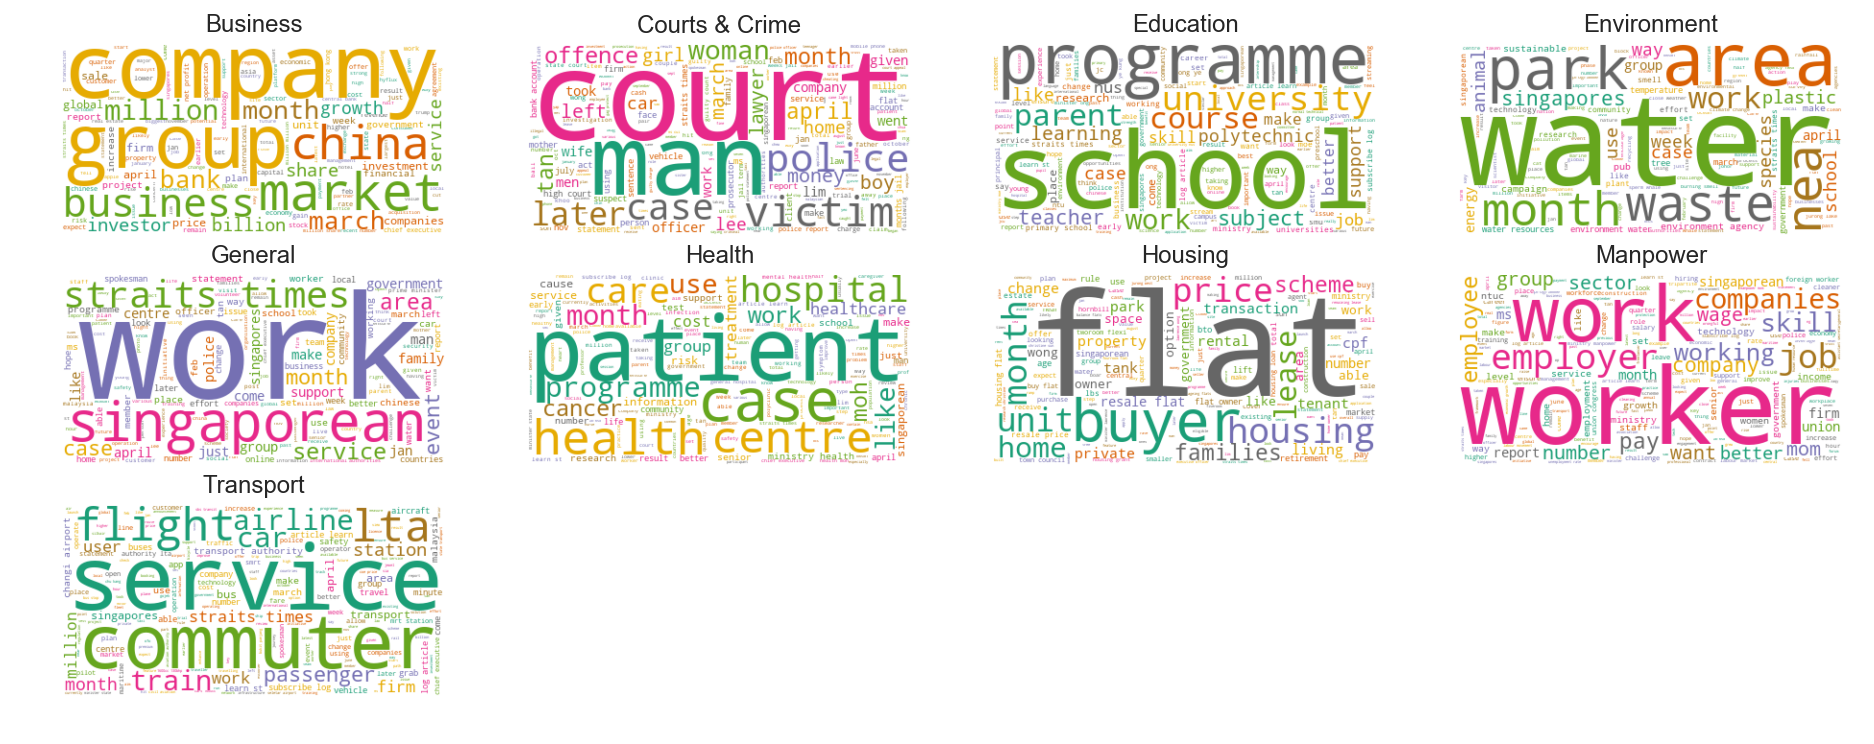

In [30]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

Categories = ['Business', 'Courts & Crime', 'Education', 'Environment', 'General', 'Health', 'Housing', 'Manpower', 'Transport']

# Create subplots for each comedian
for index, category in enumerate(data_topwords.columns):
    wc.generate(df_clean.Content[category])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(Categories[index])
    
plt.show()

In [31]:
# Find the number of unique words that each category contains

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for category in data_topwords.columns:
    uniques = data_topwords[category].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(Categories, unique_list)), columns=['category', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words',ascending=False)
data_unique_sort

,category,unique_words
4,General,131839
0,Business,107022
1,Courts & Crime,67168
8,Transport,42285
5,Health,37438
2,Education,26384
3,Environment,15695
7,Manpower,12531
6,Housing,8460


In [32]:
# Calculate the words per article of each category

# Find the total number of words that a category contains
total_list = []
for category in data_topwords.columns:
    totals = sum(data_topwords[category])
    total_list.append(totals)
    
# Category article count in respective order
article_word_count = [2549, 1010, 335, 136, 1978, 402, 66, 99, 598]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['article_word_count'] = article_word_count
data_words['words_per_article'] = data_words['total_words'] / data_words['article_word_count']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpa_sort = data_words.sort_values(by='words_per_article')
data_wpa_sort

,category,unique_words,total_words,article_word_count,words_per_article
0,Business,107022,517325,2549,202.952138
4,General,131839,411497,1978,208.036906
8,Transport,42285,130688,598,218.541806
1,Courts & Crime,67168,240808,1010,238.423762
2,Education,26384,81030,335,241.880597
5,Health,37438,102711,402,255.500000
3,Environment,15695,36406,136,267.691176
6,Housing,8460,18177,66,275.409091
7,Manpower,12531,28641,99,289.303030


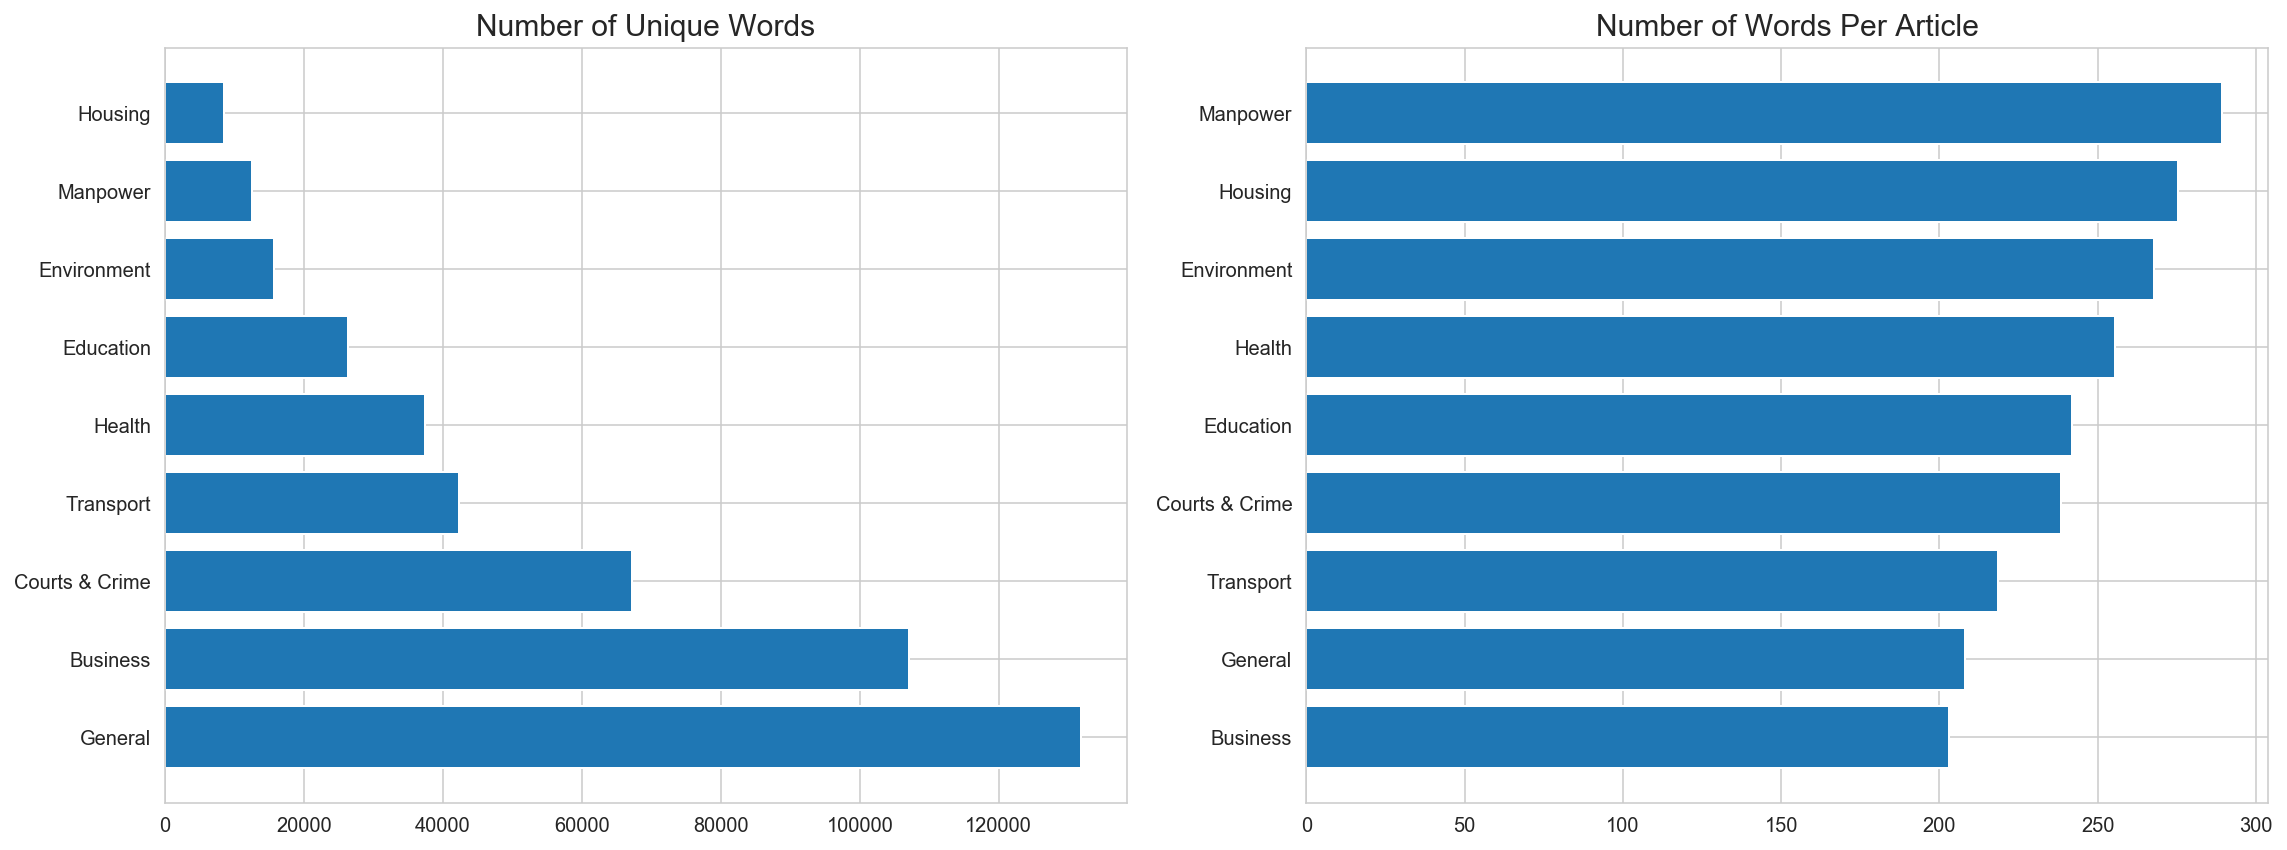

In [33]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.category)
plt.title('Number of Unique Words', fontsize=15)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpa_sort.words_per_article, align='center')
plt.yticks(y_pos, data_wpa_sort.category)
plt.title('Number of Words Per Article', fontsize=15)

plt.tight_layout()
plt.show()

### Findings
- Vocabulary
1. General contains the most unique words which is expected due to varied topics that could have covered.
2. The number of unique words decreases with total number of articles per category. With fewer articles, it is expected to have a lower vocabulary count.
- Size
1. Manpower articles have a high count of words due to its technicality
2. Business words could be constantly repeated

In [34]:
from textblob import TextBlob

TextBlob("Best").sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [35]:
df_clean


pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_clean['Polarity'] = df_clean['Content'].apply(pol)
df_clean['Subjectivity'] = df_clean['Content'].apply(sub)


In [36]:
df_clean['Categories'] = df_clean.index
df_clean

,Content,Polarity,Subjectivity,Categories
Category,,,,
Business,april saw a big pullback in launches as caut...,0.091170,0.372862,Business
Courts & Crime,three men to be the a grabhitch payment h...,0.015712,0.368736,Courts & Crime
Education,some 600 people came together over the to sm...,0.141134,0.418692,Education
Environment,a large waterspout was off singapores shores ...,0.098901,0.398240,Environment
General,all the talk about the first print exhibition ...,0.102749,0.395668,General
Health,the 23 who close contact with a nigerian man...,0.110667,0.424610,Health
Housing,home buyers can more from their central to ...,0.105955,0.377801,Housing
Manpower,worker iek saron last the khmer new year at ...,0.097212,0.404022,Manpower
Transport,by contributions from new acquisitions transp...,0.116739,0.391899,Transport


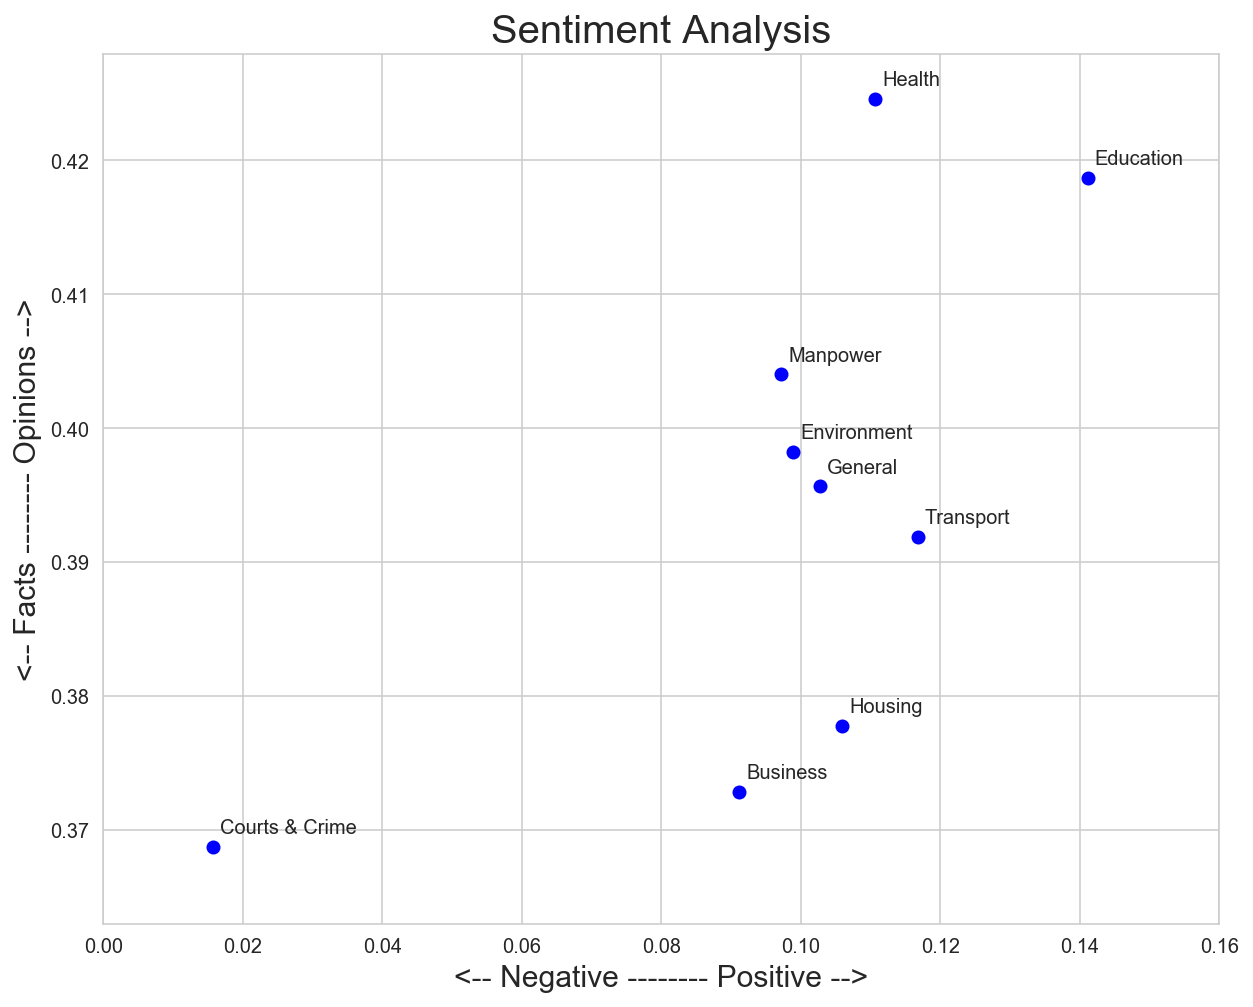

In [37]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, category in enumerate(df_clean.index):
    x = df_clean.Polarity.loc[category]
    y = df_clean.Subjectivity.loc[category]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df_clean['Categories'][index], fontsize=10)
    plt.xlim(0, .16) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [38]:
import numpy as np
import pandas as pd
import nltk
import re

In [39]:
df.head()

,Headline,Publish Date,Category,Author,Author Title,Content,Tags
0,"What else, other than Sejarah Melayu, can you ...","May 15, 2019, 4:00 am SGT",General,NaN,NaN,All the talk about The First Print exhibition ...,"['ASK NLB', 'NATIONAL LIBRARY BOARD']"
1,NUS approves plans by students' union to hold ...,"May 14, 2019, 11:50 pm SGT",General,Shabana Begum,NaN,The National University of Singapore has appro...,"['NUS', 'VOYEURS']"
2,Water management social enterprise is the firs...,"May 14, 2019, 11:15 pm SGT",General,Shabana Begum,NaN,"A local water management company, which made a...","['WATER CONSERVATION', 'AWARDS AND PRIZES']"
3,194-year-old Masjid Bencoolen to undergo $4 mi...,"May 14, 2019, 11:02 pm SGT",General,Jeanell Kiew,NaN,The 194-year-old Masjid Bencoolen will undergo...,"['MOSQUES', 'RENOVATION', 'ISLAM']"
4,ITE student scores perfect 4.0 GPA after defe...,"May 14, 2019, 10:02 pm SGT",General,Christie Chiu,NaN,In her first year at ITE College Central as a ...,"['ITE', 'LEE KUAN YEW', 'EDUCATION AND SCHOOLS..."


In [40]:
# Taking a subset of dataframe based on category
df_business = df.loc[df.Category == "Business"]

df_business.reset_index(inplace=True,drop=True)

df_business1 = df_business.drop(labels=["Category", "Publish Date", "Author", "Author Title", "Tags"],axis=1)

In [41]:
df_business1.head()

,Headline,Content
0,New private home sales fall 30% in April from ...,April saw a big pullback in launches as develo...
1,Sembcorp still keen on Hyflux's Tuaspring powe...,Sembcorp Industries is keeping its options ope...
2,SGX returns to back US$60m investment into US ...,"Trumid, a New York-based fintech startup and b..."
3,"Condo rents rise 0.6% in April, HDB rents slip...",Rents for non-landed private homes in Singapor...
4,AA Reit to buy Gold Coast industrial property ...,AIMS Apac Reit (AA Reit) is expanding its foot...


In [42]:
df_business1.Content[1]

'Sembcorp Industries is keeping its options open for Hyflux\'s Tuaspring co-generation power plant "if the price was right".Group chief executive officer Neil McGregor told The Business Times on Wednesday (May 15) at the conglomerate\'s first quarter results briefing: "We were once interested...\xa0We are keeping our options open. Naturally, if the price was right, this may be of interest to us. But we have to wait and see what transpires...\xa0So we... are keeping an eye on the development."Debt-ridden Hyflux announced on Tuesday that Tuaspring\'s only secured creditor has appointed receivers to take over the power plant.The charged property is the Tuaspring co-generation power plant, and excludes the desalination plant and other shared infrastructure that are subject to the rights of national water agency PUB.It was reported last year that Sembcorp Industries was one of only two bidders pre-approved by the PUB as potential buyers of Tuaspring, but only Sembcorp\xa0submitted a final b

In [64]:
from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

clean_articles = []
for text in df_business1['Content']:
    # Regex to add a space to periods that don't already have one, but skips non-alphanumerics like commas.
    text = re.sub(r'\.(?=[^ \W\d])', '. ', text)
    # Remove weird characters
    text = text.replace(u'\xa0', u' ')
    # Make all words smaller case
    text = text.lower()
    # To remove stop words
#     pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
#     text = pattern.sub('', text)
    
    clean_articles.append(sent_tokenize(text))


# sentences = [y for x in sentences for y in x] # flatten list

In [65]:
clean_articles[1][0]

'sembcorp industries is keeping its options open for hyflux\'s tuaspring co-generation power plant "if the price was right".'

In [66]:
len(clean_articles[0])

14

In [67]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip

In [68]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [69]:
#  400,000 different terms stored in the dictionary – ‘word_embeddings’
len(word_embeddings)

400000

In [70]:
# Extract word vectors
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [71]:
# articles_test = []
# for i in clean_articles:
#     sentences = []
#     for ii in i:
#         print(ii)
#         print(len(ii))
#         print("next")
#         sentences.append(ii)
#     articles_test.append(sentences)

In [72]:
article_vectors = []
for article in clean_articles:
    sentences = []
    for line in article:
        if len(line) != 0:
            v = sum([word_embeddings.get(w, np.zeros((100,))) for w in line.split()])/(len(line.split())+0.001)
        else:
            v = np.zeros((100,))
        sentences.append(v)
    article_vectors.append(sentences)

In [73]:
len(article_vectors)

2526

In [74]:
len(clean_articles)

2526

In [75]:
test=article_vectors[0]
test

[array([-9.15483239e-02,  3.92299779e-02,  1.16819775e-01, -5.96835427e-02,
         5.17916612e-02, -2.19803755e-01, -6.51552918e-02,  1.03183990e-02,
        -1.10210338e-01, -5.14811393e-02, -5.33404529e-02, -1.84035036e-01,
         1.07813832e-01, -1.81940470e-01,  1.32014517e-01,  3.14516480e-03,
        -1.00703024e-01,  6.72605162e-02,  8.42780367e-02,  1.40028402e-01,
         4.84238526e-01,  6.27372105e-04,  1.49959607e-01,  2.61948548e-01,
         6.16907688e-02, -1.63607496e-01, -1.57088408e-01, -1.73906545e-01,
        -2.27757772e-01, -7.72072539e-03, -8.54212146e-02,  2.24510394e-01,
        -8.87095988e-02, -6.33093464e-02,  1.62125658e-01,  2.88962084e-01,
         3.42592184e-02,  4.42580457e-02, -5.67011928e-02, -1.63138695e-01,
        -1.72108217e-01, -2.26239753e-01,  2.02994004e-01,  5.69436292e-04,
         1.99035297e-01, -2.17724489e-01,  3.95673561e-01, -6.49873568e-02,
         1.64339440e-01, -7.36054880e-01, -6.93146239e-02, -1.40460335e-01,
         1.9

In [84]:
# similarity matrix
sim_mat = np.zeros([len(clean_articles[0]), len(clean_articles[0])])

In [85]:
sim_mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [78]:
article_vectors[0]

[array([-9.15483239e-02,  3.92299779e-02,  1.16819775e-01, -5.96835427e-02,
         5.17916612e-02, -2.19803755e-01, -6.51552918e-02,  1.03183990e-02,
        -1.10210338e-01, -5.14811393e-02, -5.33404529e-02, -1.84035036e-01,
         1.07813832e-01, -1.81940470e-01,  1.32014517e-01,  3.14516480e-03,
        -1.00703024e-01,  6.72605162e-02,  8.42780367e-02,  1.40028402e-01,
         4.84238526e-01,  6.27372105e-04,  1.49959607e-01,  2.61948548e-01,
         6.16907688e-02, -1.63607496e-01, -1.57088408e-01, -1.73906545e-01,
        -2.27757772e-01, -7.72072539e-03, -8.54212146e-02,  2.24510394e-01,
        -8.87095988e-02, -6.33093464e-02,  1.62125658e-01,  2.88962084e-01,
         3.42592184e-02,  4.42580457e-02, -5.67011928e-02, -1.63138695e-01,
        -1.72108217e-01, -2.26239753e-01,  2.02994004e-01,  5.69436292e-04,
         1.99035297e-01, -2.17724489e-01,  3.95673561e-01, -6.49873568e-02,
         1.64339440e-01, -7.36054880e-01, -6.93146239e-02, -1.40460335e-01,
         1.9

In [86]:
from sklearn.metrics.pairwise import cosine_similarity

for i in range(len(article_vectors[0])):
    for j in range(len(clean_articles[0])):
        if i != j:
            sim_mat[i][j] = cosine_similarity(article_vectors[0][i].reshape(1,100), article_vectors[0][j].reshape(1,100))[0,0]

In [87]:
sim_mat

array([[0.        , 0.87243397, 0.88679361, 0.91501516, 0.82815864,
        0.87968608, 0.91420834, 0.75164082, 0.90809635, 0.90470961,
        0.86902862, 0.89840245, 0.87274434, 0.88499376],
       [0.87243397, 0.        , 0.88601414, 0.97709793, 0.90892821,
        0.84078856, 0.88370199, 0.73126437, 0.83038376, 0.87252877,
        0.98630704, 0.87151835, 0.96529652, 0.8470765 ],
       [0.88679361, 0.88601414, 0.        , 0.92349116, 0.8566897 ,
        0.88269385, 0.90040629, 0.83679171, 0.89965832, 0.92900144,
        0.87973941, 0.93588391, 0.90194675, 0.85042435],
       [0.91501516, 0.97709793, 0.92349116, 0.        , 0.92656806,
        0.88780661, 0.91887534, 0.7688029 , 0.87492718, 0.91811531,
        0.9761553 , 0.90657414, 0.96796176, 0.87387975],
       [0.82815864, 0.90892821, 0.8566897 , 0.92656806, 0.        ,
        0.82280821, 0.82827258, 0.71912507, 0.80259986, 0.85462563,
        0.91153055, 0.82813664, 0.94429432, 0.81102953],
       [0.87968608, 0.84078856, 0.8

In [88]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)

In [89]:
ranked_articles = sorted(((scores[i],s) for i,s in enumerate(clean_articles[0])), reverse=True)

In [94]:
print(ranked_articles)

[(0.07390036655669381, 'developers sold 735 private homes in april, down 30 per cent from the 1,054 units they moved a month ago, but almost the same as the 733 units booked in the same month last year.'), (0.07360043439090476, '"given the amount of supply that is coming, developers will have to be very realistic in pricing in order to move their projects," mr ong added.'), (0.07280167072099557, 'especially with the amount of supply coming, we may see fluctuations, or lower launch numbers going forward until demand picks up.'), (0.07247304698789277, '"over 76.1 per cent of the units that were sold in april were from projects previously launched in 2018.'), (0.0724730172847486, 'this is according to figures released by the urban redevelopment authority (ura) on wednesday (may 15).'), (0.07222902687509297, 'propnex realty chief executive mr ismail gafoor said: ""private new home sales maintained resiliency, despite the lack of any major launches for the month of april.'), (0.071944830706

In [93]:
# Extract top 10 sentences as the summary
for i in range(5):
    print(ranked_articles[i][1].capitalize(),'END')

Developers sold 735 private homes in april, down 30 per cent from the 1,054 units they moved a month ago, but almost the same as the 733 units booked in the same month last year. END
"given the amount of supply that is coming, developers will have to be very realistic in pricing in order to move their projects," mr ong added. END
Especially with the amount of supply coming, we may see fluctuations, or lower launch numbers going forward until demand picks up. END
"over 76.1 per cent of the units that were sold in april were from projects previously launched in 2018. END
This is according to figures released by the urban redevelopment authority (ura) on wednesday (may 15). END


In [ ]:
clean_articles[0]